---
---

<h1><center><ins>Exercise Sheet 9</ins></center></h1>
<h2><center>Numerical Methods <br>

---
---

# Exercise 1 - Fit a straight line 

The attached data file (```mmr_lg.dat```) contains observations of two quantities (mass and metallicity) measured for a sample of nearby galaxies. This file contains four columns: log10(mass), average metallicity, error on log10(mass) and error on average metallicity. 

*For this exercise, you can neglect the error on the mass, and consider only the one on the metallicity.*

**(A)** Fit a straight line to this dataset. To do this, first write down your model, and define the model parameters you will consider. By using the equations we saw in the lecture, compute:

* the best-fit values for your model parameters
* the uncertainties on the parameters, the covariance and the correlation coefficient $r_{\rm ab}$ on the parameters errors
* the goodness of fit. 


a= -3.423 ± 0.822
b= 0.265 ± 0.129

cov(a,b)= -0.102
r_ab=     -0.960

χ²=       19.995
ν=        17
χ²/ν=     1.176


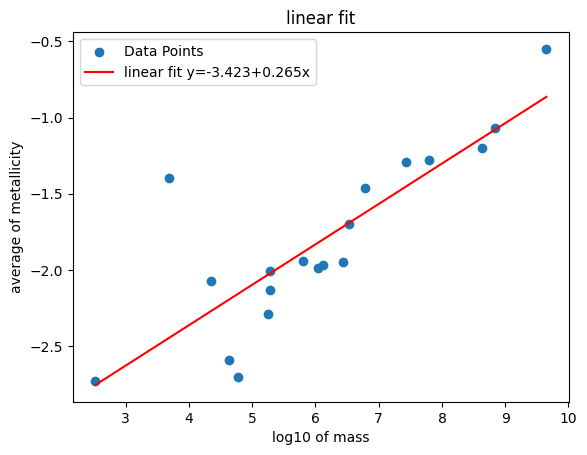

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from scipy.stats import linregress
from scipy.optimize import curve_fit

data = np.loadtxt( 'mmr_lg.dat' )
x, y, ex, ey = data.T                     # transform matrix/array to columns

ooss=   1.0 / ey*ey                       # formulas from the lecture (slide 38)
S=      np.sum( ooss )                    # 1/σ² in all sums
Sx=     np.sum( ooss * x )
Sy=     np.sum( ooss * y )
Sxx=    np.sum( ooss * x * x )
Sxy=    np.sum( ooss * x * y )
Delta=  S * Sxx - Sx**2
a=      ( Sxx * Sy - Sx * Sxy ) / Delta   # parameters of the line
b=      ( S * Sxy - Sx * Sy ) / Delta
sig_a=  np.sqrt( Sxx / Delta )            # uncerttainties of the parameters (slide 42)
sig_b=  np.sqrt( S / Delta )
cov_ab= -Sx / Delta                       # covariance (slide 43)
r_ab=   -Sx / np.sqrt( S * Sxx )          # coefficient of correlation (slide 44)
y_fit= a + b * x                          # goodness of fit (slide 24)
chi2= np.sum( ( ( y - y_fit ) / ey )**2 )
nu= len( x ) - 2                          # (a,b)=2 degrees of freedom
chi2_nu= chi2 / nu

print( f'a= {a:.3f} ± {sig_a:.3f}' )
print( f'b= {b:.3f} ± {sig_b:.3f}' )
print()
print( f'cov(a,b)= {cov_ab:.3f}' )
print( f'r_ab=     {r_ab:.3f}' )
print()
print( f'χ²=       {chi2:.3f}' )
print( f'ν=        {nu}' )
print( f'χ²/ν=     {chi2_nu:.3f}' )

xMin= min(x)
xMax= max(x)
plt.scatter( x, y, label='Data Points' )
plt.plot( [xMin, xMax], [a+b*xMin, a+b*xMax], color='red', label=f'linear fit y={a:.3f}+{b:.3f}x' )
plt.title( 'linear fit' )
plt.xlabel( 'log10 of mass' )
plt.ylabel( 'average of metallicity' )
plt.legend()
plt.show()



**(B)** Discuss the results you obtained in point (A).


> χ² is close to ν. That means, that the model fits good to the data.

> cov<0 means, that the parameters are inversly connected: if one grows, the other will shrink

> coefficient of correlation is between -1 and 1; usually negative for lineat fit and usually strong bound


**(C)** Compute the Pearson's correlation coefficient $r$ for this data set. How does it relate to the goodness of fit you recovered above? Is it useful to consider this quantity in this case? Why?

> see **(A)** and **(B)**

# Exercise 2 - Familiarize with python built-in functions

**(A)** Take a look at the documentation of the following 3 python built-in functions:

* ```numpy.polynomial.polynomial.Polynomial.fit``` (https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html)
* ```scipy.stats.linregress``` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)
* ```scipy.optimize.curve_fit``` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

Pay attention especially to the quantities and parameters that you need to provide to run these functions, and to those that are returned as result. For each function, provide an answer to the following questions:

1. What possible applications can this function be used for? (e.g.: fit of a straight line to data with errors on the dependent variable)
2. Are the returned quantities providing a full description of the fit? If not, what is missing?


> numpy.polynomial.polynomial.Polynomial.fit

applications:
- polynomial fits of any order (linear, auqdratic,...)
- quick apporoximation of data points without errors and weights

returns:
- a series that represents the least squares fit to the data and has the domain and window specified in the call

missing:
- covariance
- goodness-of-fit (χ²)
- errors on data points
- weights


> scipy.stats.linregress

applications:
- simple linear regression y=a+bx

returns a LinregressResult object containing
- parameters a and b
- p-value
- std error σ in slope b
Comparison
missing:
- std error σ in intercept a
- covariance
- goodness-of-fit (χ²)
- errors on data points
- weights


> scipy.optimize.curve_fit

applications:
- several models, not just polimnomial
- weighted fits

returns:
- popt: best parameter values
- pcov: covariance matrix of the popt parameters

missing:
- goodness-of-fit (χ²)



**(B)** Use all the above functions to fit a straight line to the set of data from Exercise 1. What are the results you get for each of these methods? What differences do you find? Compare them also to the ones you obtained in Exercise 1: are there any differences?


                                                  a          b
numpy.polynomial.polynomial.Polynomial.fit:   -3.422604   0.265082
scipy.stats.linregress:                       -3.422604   0.265082
scipy.optimize.curve_fit:                     -3.450291   0.272048


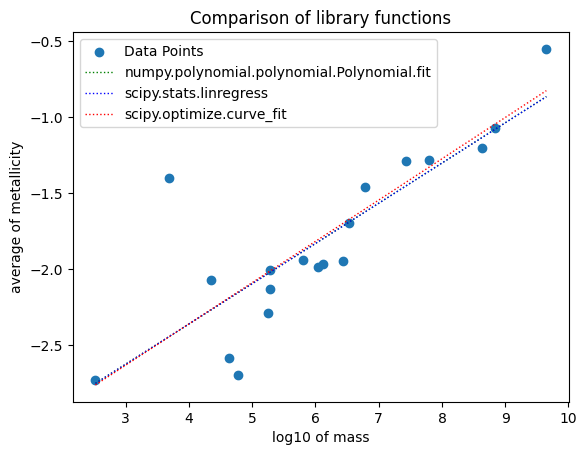

In [80]:

# numpy.polynomial.polynomial.Polynomial.fit
poly= Polynomial.fit( x, y, deg=1 )
a1= poly.convert().coef[0]
b1= poly.convert().coef[1]


# scipy.stats.linregress
coef= linregress( x, y )
a2 = coef.intercept
b2 = coef.slope


# scipy.optimize.curve_fit
def lin_model( x, a, b ):
  return a + b*x

[ a3, b3 ], _ = curve_fit( lin_model, x, y, sigma=ey, absolute_sigma=True)

print( f'                                                  a          b' )
print( f'numpy.polynomial.polynomial.Polynomial.fit:   {a1:.6f}   {b1:.6f}' )
print( f'scipy.stats.linregress:                       {a2:.6f}   {b2:.6f}' )
print( f'scipy.optimize.curve_fit:                     {a3:.6f}   {b3:.6f}' )

plt.scatter( x, y, label='Data Points' )
plt.plot( [xMin, xMax], [a1+b1*xMin, a1+b1*xMax], color='green', linewidth=1, linestyle=':', label='numpy.polynomial.polynomial.Polynomial.fit' )
plt.plot( [xMin, xMax], [a2+b2*xMin, a2+b2*xMax], color='blue', linewidth=1, linestyle=':', label='scipy.stats.linregress' )
plt.plot( [xMin, xMax], [a3+b3*xMin, a3+b3*xMax], color='red', linewidth=1, linestyle=':', label='scipy.optimize.curve_fit' )
plt.title( 'Comparison of library functions' )
plt.xlabel( 'log10 of mass' )
plt.ylabel( 'average of metallicity' )
plt.legend()
plt.show()


> scipy.optimize.curve_fit shows slightly different parameters a and b, because it also takes the specified errors into account


**(C)** Fit a parabola to the same dataset. To do this, consider your answers to the questions in point (A) of this exercise, to decide which method to use. Provide all the quantities listed in point (A) of Exercise 1 and discuss the results you obtain, also in comparison to those you obtained when fitting a straight line to the data.

parameters for y=a+bx+cx²
a= -1.782 ± 0.842
b= -0.283 ± 0.269
c= 0.043 ± 0.020

covariance matrix:
[[ 7.09203212e-01 -2.22674021e-01  1.63403502e-02]
 [-2.22674021e-01  7.21722600e-02 -5.43548629e-03]
 [ 1.63403502e-02 -5.43548629e-03  4.20230232e-04]]

χ²=       15.550
ν=        16
χ²/ν=     0.972


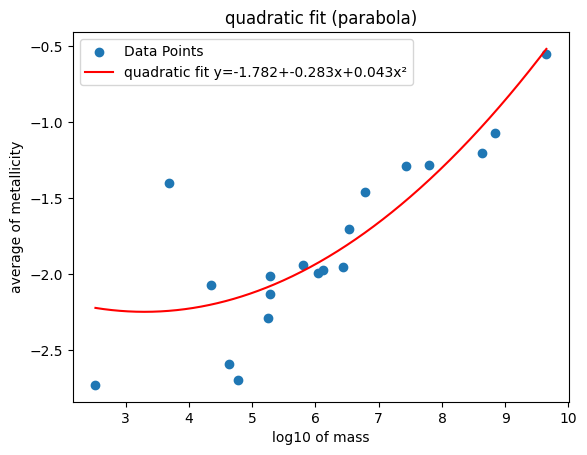

In [88]:

def parbola_model( x, a, b, c ):
  return a + b*x + c*x*x

popt, pcov= curve_fit( parbola_model, x, y, sigma=ey, absolute_sigma=True )
a= popt[0]                           # parameter a
b= popt[1]                           # parameter b
c= popt[2]                           # parameter c
errors= np.sqrt( np.diag( pcov ) )   # error from covariation matrix

y_fit= parbola_model( x, a, b, c )   # goodness-of-fit
chi2= np.sum( ( ( y - y_fit ) / ey )**2 )
nu= len( x ) - 3                     # (a,b,c)=3 degrees of freedom
chi2_nu= chi2 / nu

print( 'parameters for y=a+bx+cx²')
print( f'a= {a:.3f} ± {errors[0]:.3f}' )
print( f'b= {b:.3f} ± {errors[1]:.3f}' )
print( f'c= {c:.3f} ± {errors[2]:.3f}' )
print()
print( 'covariance matrix:' )
print( pcov )
print()
print( f'χ²=       {chi2:.3f}' )
print( f'ν=        {nu}' )
print( f'χ²/ν=     {chi2_nu:.3f}' )

X= np.linspace( xMin, xMax, 500 )
Y= parbola_model( X, a, b, c )

plt.scatter( x, y, label='Data Points' )
plt.plot( X, Y, color='red', label=f'quadratic fit y={a:.3f}+{b:.3f}x+{c:.3f}x²' )
plt.title( 'quadratic fit (parabola)' )
plt.xlabel( 'log10 of mass' )
plt.ylabel( 'average of metallicity' )
plt.legend()
plt.show()

#EOF

# Exercise 3 - Preparation to MCMC fitting

**(A)** Read the blog entry '*Bayesian inference problem, MCMC and variational inference*' that you can find at this link: https://towardsdatascience.com/bayesian-inference-problem-mcmc-and-variational-inference-25a8aa9bce29

You can skip the part on Variational Inference, but please read carefully the parts on Bayesian inference and MCMC. After reading this text, write a brief answer (in your words!) to each of the following questions:

* What does each of the terms in Bayes' Theorem represent?
* If you had no knowledge about the probability for some event to occur, what type of distribution would you use for the prior?
* If you had new observations about the probability for some event to occur, how would you incorporate this in a Bayesian framework?
* What does MCMC mean? What is it?
* What is the main purpose of MCMC, and how is it related to Bayesian inference?

**(B)** The ```emcee``` package is a python implementation of a MCMC ensemble sampler, and is widely used in astronomy. In this task you will only have to install the packages ```emcee``` and ```corner``` (which is useful for plotting results) on your computer. You should be able to simply use ```pip``` to do that. 

If you need help, you can take a look at the 'Installation' section in the webpage containing the documentation of ```emcee```: https://emcee.readthedocs.io/en/stable/. 

When you have installed these packages, run the following cell to make sure that everything went well and that you can indeed import them without errors.

In [89]:
import emcee   #likely need to install with pip first... e.g.,   pip install emcee
import corner  #likely need to install with pip first... e.g.,   pip install corner